In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation

#plt.style.use('tableau-colorblind10')
sns.set(font_scale=0.8)
%matplotlib widget

In [289]:
#Number of agents
N = 4

In [290]:
ifile = "simulation_params_N4C0.01Th0.25.dat"#"params/N4/Th0.25/simulation_params_N4C0.01Th0.25.dat"
plot_folder = "plots/"
plot_subfolder1 = "data_distribution/N4/" 

## Load data

In [291]:
df = pd.read_table(ifile, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_20304/1870271977.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(ifile, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])


,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,0.234225,0.260267,0.098369,0.108542,0.041099,0.021856,1.000000,0.0,0.808920,0.000026,0.9865
1,0.232775,0.337926,0.072359,0.104385,0.293067,0.018747,1.000000,0.0,0.809137,-0.000053,0.9880
2,0.231916,0.405940,0.062008,0.108539,0.088004,0.025377,1.000000,0.3,0.805053,0.000002,0.9805
3,0.230643,0.137947,0.179978,0.107647,0.416936,0.011324,0.333333,1.5,0.807760,0.000002,0.9900
4,0.236406,0.233449,0.125014,0.123447,0.294330,0.019112,0.500000,0.5,0.807609,0.000004,0.9855
...,...,...,...,...,...,...,...,...,...,...,...
596,0.222927,0.153078,0.143277,0.097872,0.287238,0.009668,0.500000,0.5,0.807977,0.000033,0.9910
597,0.233218,0.239891,0.122450,0.125955,0.287941,0.020703,0.500000,0.5,0.807298,0.000002,0.9845
598,0.233579,0.278726,0.085401,0.101023,0.273516,0.014672,1.000000,0.0,0.809977,-0.000052,0.9915
599,0.237055,0.409588,0.062615,0.108188,0.051129,0.027259,1.000000,0.0,0.812637,0.000004,0.9875


In [292]:
df['efficiency'].describe()

count    601.000000
mean       0.230704
std        0.009383
min        0.180180
25%        0.227060
50%        0.233553
75%        0.236641
max        0.245667
Name: efficiency, dtype: float64

In [293]:
#data_f = pd.read_csv("data/MFP_4medidas.csv")
#data_f.head()

In [294]:
#df = data_f[['efficiency','entropy','attendance','inequality']]

In [295]:
#df[(df['efficiency']<201) & (df['inequality']<50) & (df['info_per_agent']<=1)]

In [296]:
#df[(df['efficiency']>201) & (df['inequality']>200) & (df['entropy']<=0.1)]

In [297]:
#Filter out data where all agents choose 0 always or all agents choose 1 always
#df = df[(df['int_entropy']>0)].reset_index()
#df = df[(df['int_entropy']>0) & (df['info_per_agent']<=N)].reset_index()
#df

## Plot data

<Axes: xlabel='efficiency', ylabel='inequality'>

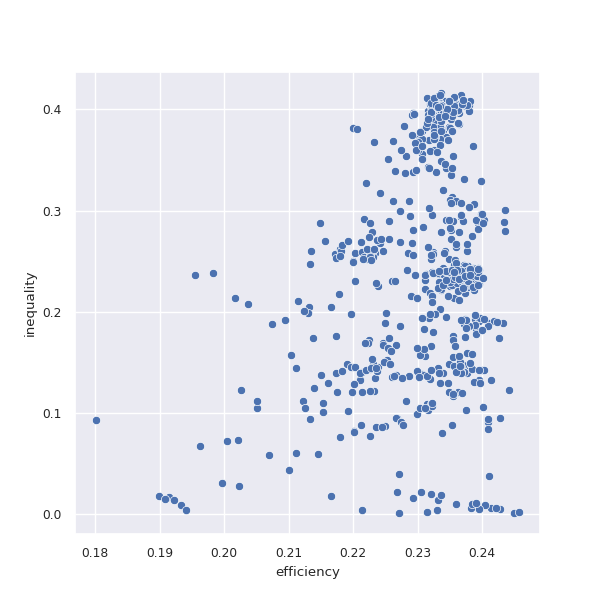

In [298]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df, ax=ax, x='efficiency', y='inequality')

## Standardize data

In [299]:
#df_std = df[['n_efficiency','n_inequality','entropy','info_per_agent']].apply(lambda x: x-np.mean(x))
#df_std = df_std.apply(lambda x: x/np.std(x))
#df_std.head()

In [300]:
#X_dat = df_std.to_numpy()
#X_dat.shape

In [301]:
df_red = df[['n_efficiency','n_inequality','entropy']]
#scaler = MinMaxScaler()
#scaler.fit(df_red)
X_dat = df_red.to_numpy() #scaler.transform(df_red)
X_dat.shape

(601, 3)

# 2D

## t-sne

In [302]:
from sklearn.manifold import TSNE

In [303]:
# Get t-sne embeding with 2 dimensions
tsne = TSNE(n_components=2,learning_rate='auto',perplexity=30,init='random')
tsne_result = tsne.fit_transform(X_dat)
tsne_result.shape

(601, 2)

In [304]:
df_tsne_res = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
df_tsne_res = df_tsne_res.join(df)
df_tsne_res.head()

,tsne_1,tsne_2,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,1.484356,-37.484409,0.234225,0.260267,0.098369,0.108542,0.041099,0.021856,1.000000,0.0,0.808920,0.000026,0.9865
1,-21.451258,1.310195,0.232775,0.337926,0.072359,0.104385,0.293067,0.018747,1.000000,0.0,0.809137,-0.000053,0.9880
2,-11.308224,-11.109611,0.231916,0.405940,0.062008,0.108539,0.088004,0.025377,1.000000,0.3,0.805053,0.000002,0.9805
3,19.988445,9.406172,0.230643,0.137947,0.179978,0.107647,0.416936,0.011324,0.333333,1.5,0.807760,0.000002,0.9900
4,-0.345402,16.686077,0.236406,0.233449,0.125014,0.123447,0.294330,0.019112,0.500000,0.5,0.807609,0.000004,0.9855


In [305]:
df_tsne_res['cond_entropy'].describe()

count    601.000000
mean       0.015289
std        0.008982
min        0.000000
25%        0.010359
50%        0.015650
75%        0.020124
max        0.098853
Name: cond_entropy, dtype: float64

Pure segmentation: cond_entropy=0, entropy=0, efficiency=0.5, inequality=max\
Pure alternation: cond_entropy=0, entropy>0, efficiency=0.5, inequality=0


In [306]:
nbins = 10
xinf = df_tsne_res['efficiency'].min()
xsup = 0.5 #df_tsne_res['efficiency'].max()
yinf = df_tsne_res['cond_entropy'].min()
ysup = 0.2 #df_tsne_res['cond_entropy'].max()
x = np.linspace(xinf,xsup,nbins)
y = np.linspace(yinf,ysup,nbins)
lefce = np.zeros((nbins,nbins))
for i in range(nbins-1):
    for j in range(nbins-1):
        df_1 = df_tsne_res[(df_tsne_res['efficiency']>=x[i]) & (df_tsne_res['efficiency']<=x[i+1]) &
                           (df_tsne_res['cond_entropy']>=y[j]) & (df_tsne_res['cond_entropy']<=y[j+1])]
        lefce[i,j] = df_1.shape[0]/df.shape[0]

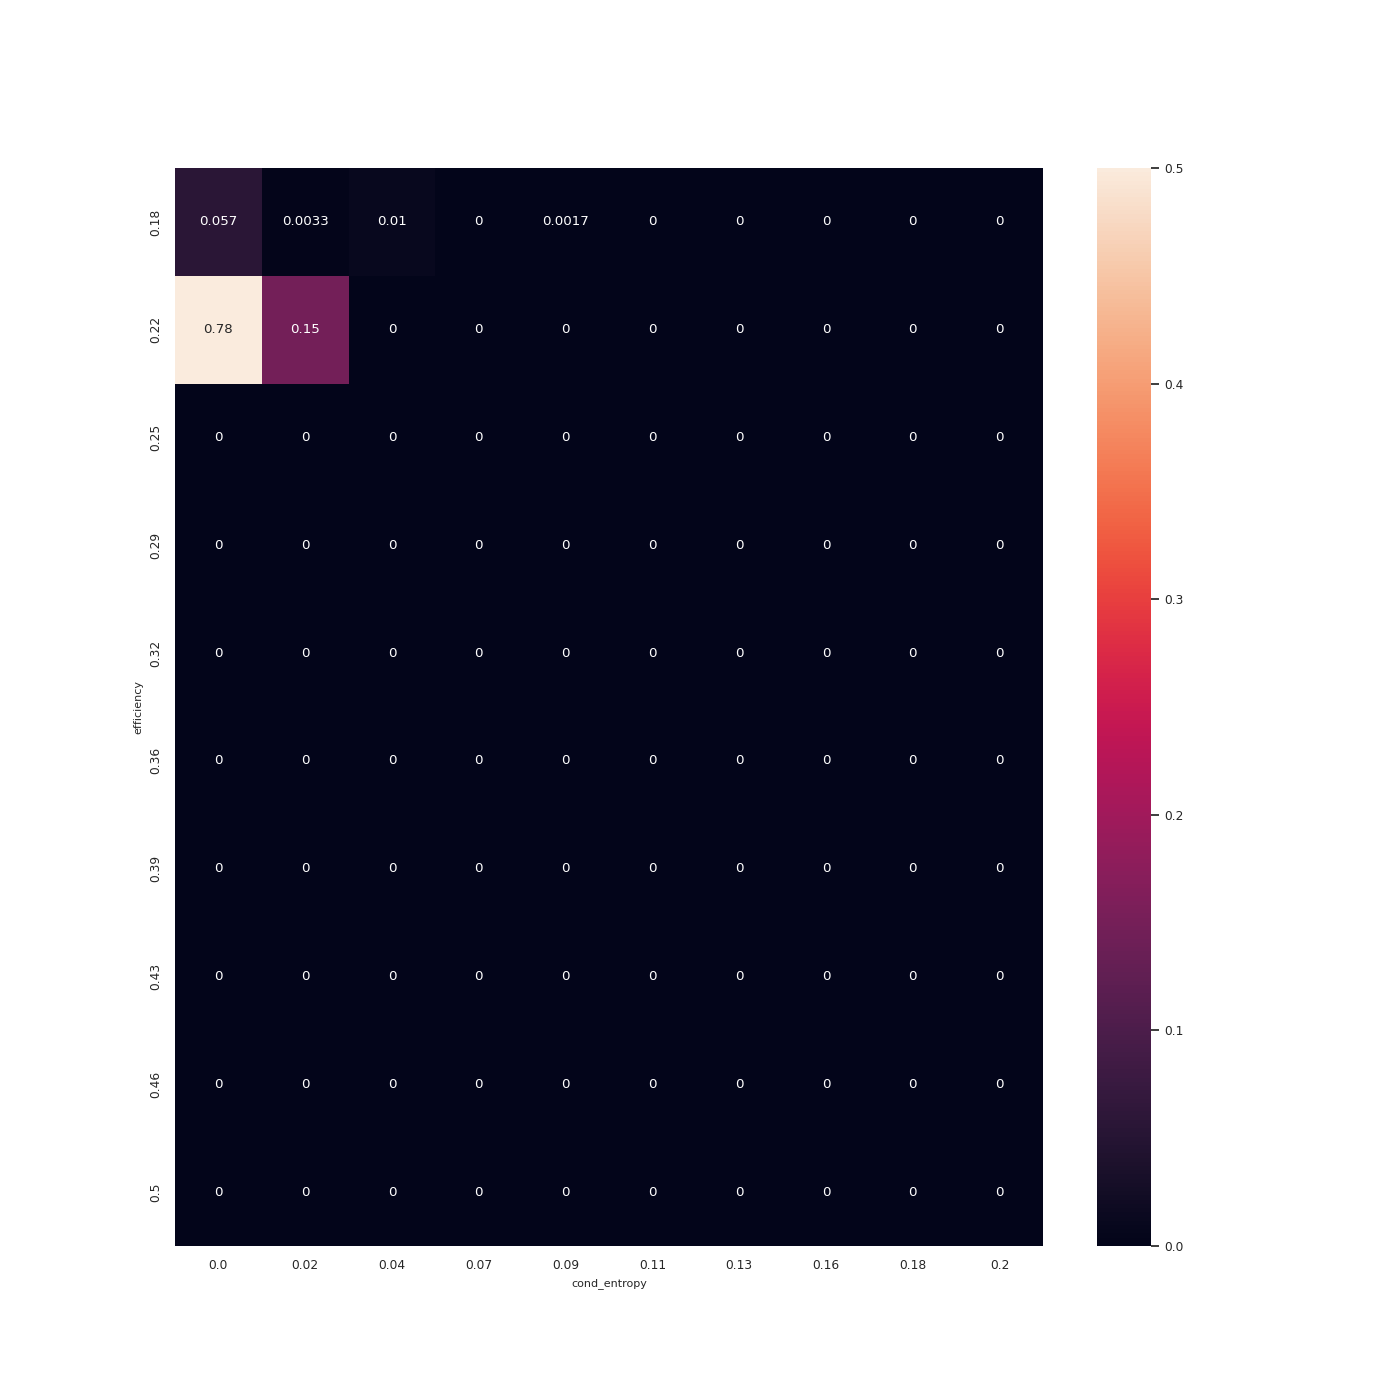

In [307]:
fig0, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lefce, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=0.5,annot=lefce)
ax.set_ylabel('efficiency',fontsize=8)
ax.set_xlabel('cond_entropy',fontsize=8)
fname = ifile[28:].rstrip('.dat')+'.png'
#plt.savefig(plot_folder+plot_subfolder1+'eff_centropy/eff_centropy_'+fname)

In [308]:
nbins = 10
xinf = df_tsne_res['inequality'].min()
xsup = 0.5 #df_tsne_res['efficiency'].max()
yinf = df_tsne_res['cond_entropy'].min()
ysup = 0.2 #df_tsne_res['cond_entropy'].max()
x = np.linspace(xinf,xsup,nbins)
y = np.linspace(yinf,ysup,nbins)
lefce = np.zeros((nbins,nbins))
for i in range(nbins-1):
    for j in range(nbins-1):
        df_1 = df_tsne_res[(df_tsne_res['inequality']>=x[i]) & (df_tsne_res['inequality']<=x[i+1]) &
                           (df_tsne_res['cond_entropy']>=y[j]) & (df_tsne_res['cond_entropy']<=y[j+1])]
        lefce[i,j] = df_1.shape[0]/df.shape[0]

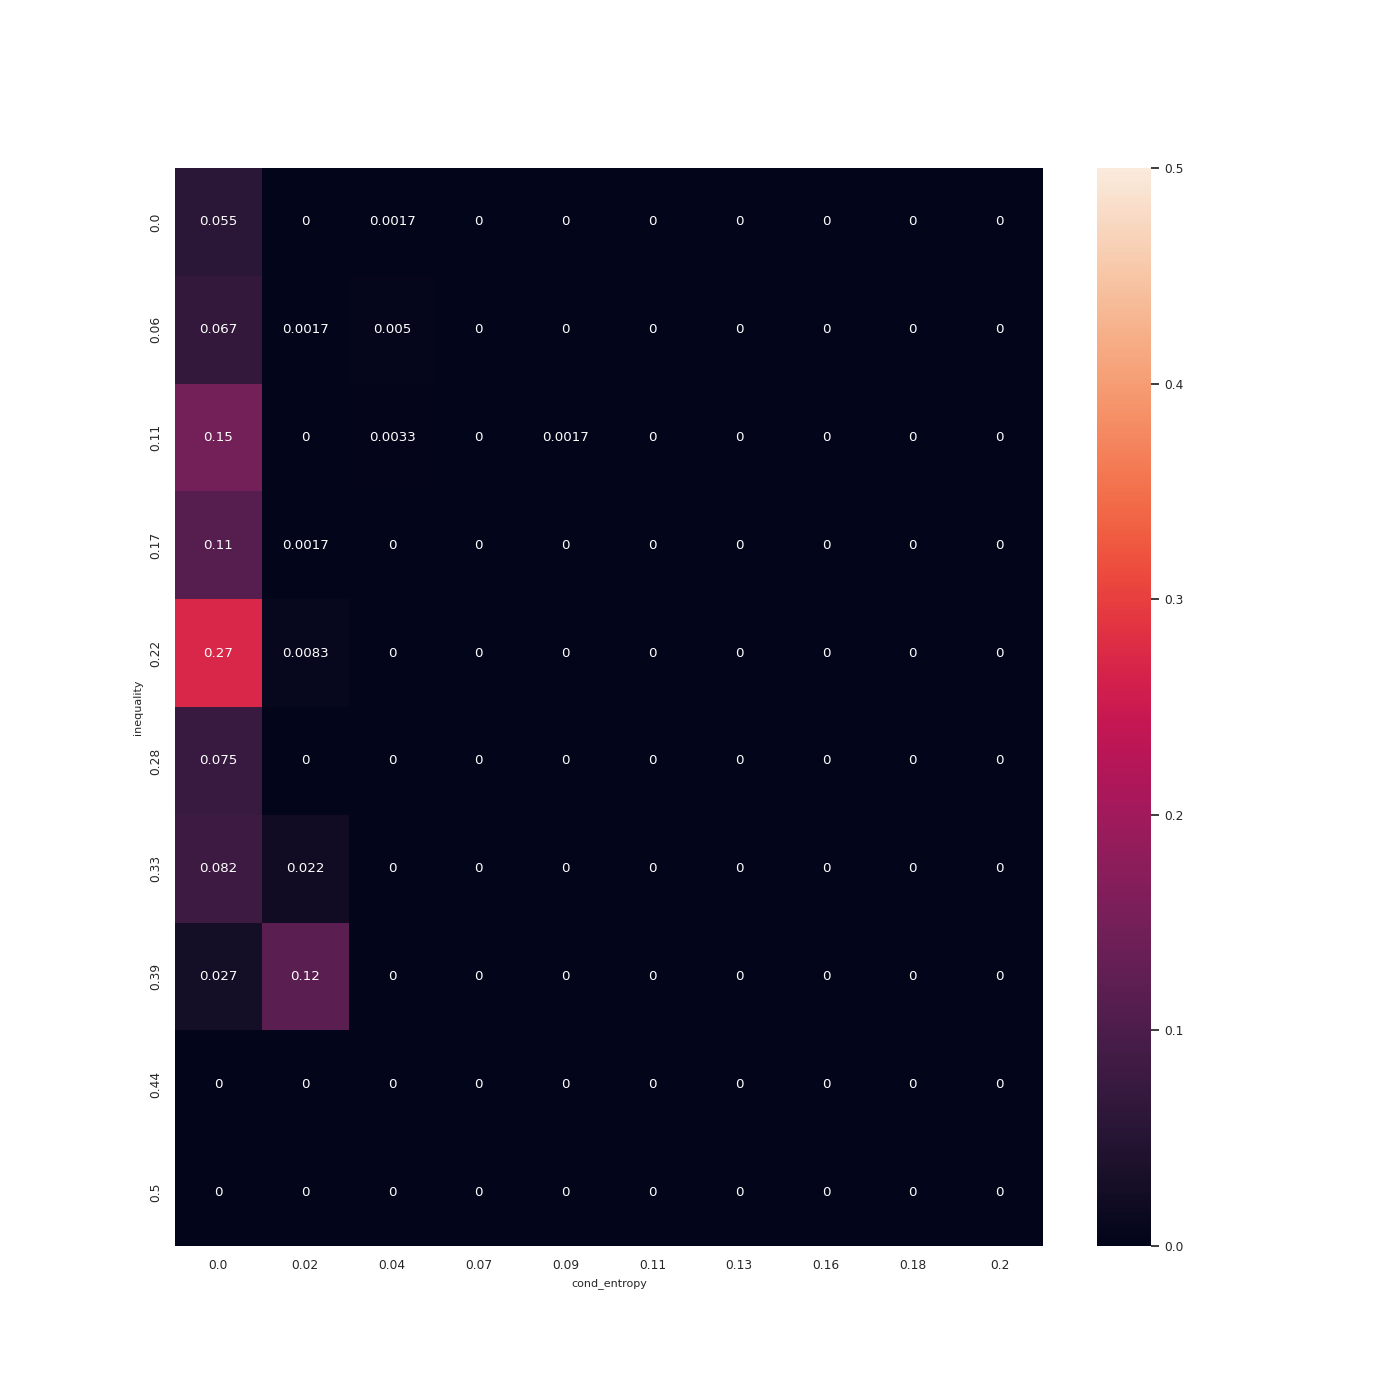

In [309]:
fig1, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lefce, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=0.5,annot=lefce)
ax.set_ylabel('inequality',fontsize=8)
ax.set_xlabel('cond_entropy',fontsize=8)
fname = ifile[28:].rstrip('.dat')+'.png'
#plt.savefig(plot_folder+plot_subfolder1+'ineq_centropy/ineq_centropy_'+fname)

In [310]:
nbins = 10
xinf = df_tsne_res['efficiency'].min()
xsup = 0.5 #df_tsne_res['efficiency'].max()
yinf = df_tsne_res['inequality'].min()
ysup = 0.5 #df_tsne_res['cond_entropy'].max()
x = np.linspace(xinf,xsup,nbins)
y = np.linspace(yinf,ysup,nbins)
lefce = np.zeros((nbins,nbins))
for i in range(nbins-1):
    for j in range(nbins-1):
        df_1 = df_tsne_res[(df_tsne_res['efficiency']>=x[i]) & (df_tsne_res['efficiency']<=x[i+1]) & 
                           (df_tsne_res['inequality']>=y[j]) & (df_tsne_res['inequality']>=y[j+1])]
        lefce[i,j] = df_1.shape[0]/df.shape[0]

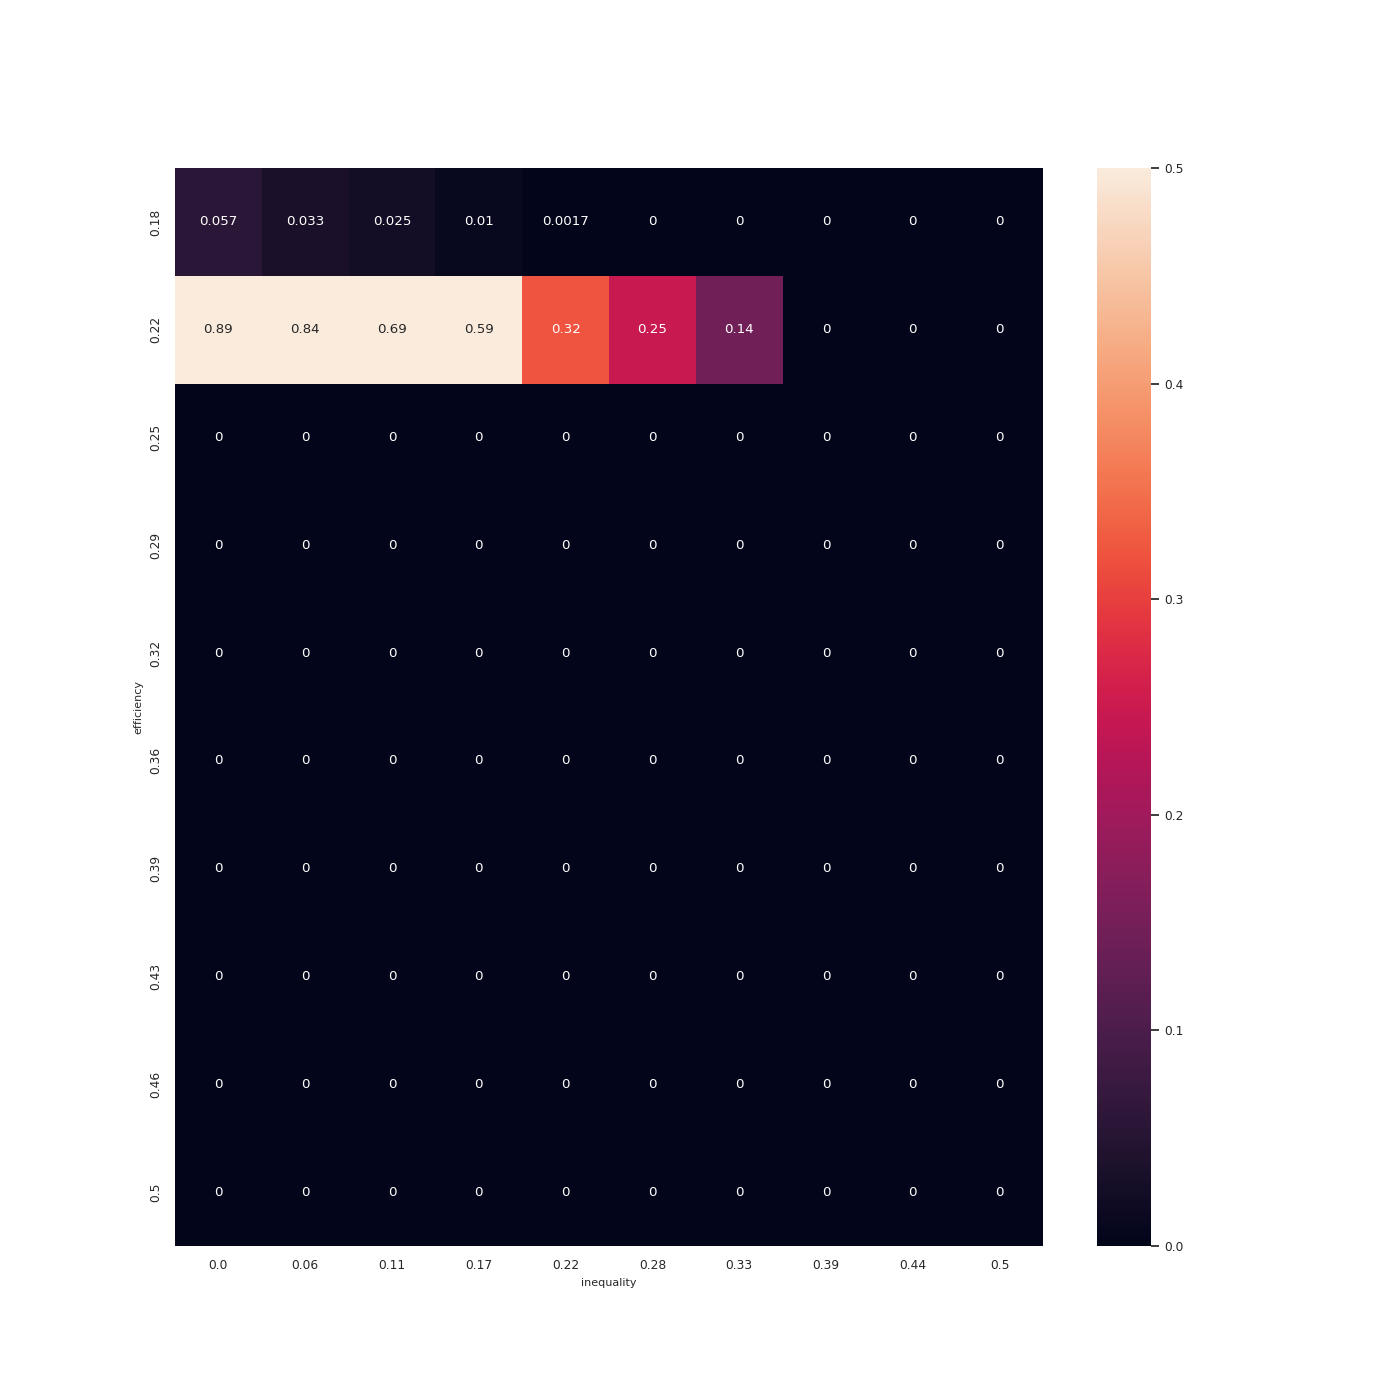

In [311]:
fig2, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lefce, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=0.5,annot=lefce)
ax.set_ylabel('efficiency',fontsize=8)
ax.set_xlabel('inequality',fontsize=8)
fname = ifile[28:].rstrip('.dat')+'.png'
#plt.savefig(plot_folder+plot_subfolder1+'eff_ineq/eff_ineq_'+fname)

In [312]:
df_tsne_res[(df_tsne_res['tsne_1']>-20) & (df_tsne_res['tsne_1']<-10) & (df_tsne_res['tsne_2']>20) & (df_tsne_res['tsne_2']<23)]

,tsne_1,tsne_2,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc


In [313]:
df_tsne_res[(df_tsne_res['efficiency']>0.22) & (df_tsne_res['inequality']<0.15)]

,tsne_1,tsne_2,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
3,19.988445,9.406172,0.230643,0.137947,0.179978,0.107647,0.416936,0.011324,0.333333,1.500,0.807760,0.000002,0.9900
39,31.059847,0.635245,0.241421,0.005930,0.241379,0.005929,0.500000,0.000000,0.250000,2.000,0.810872,-0.000002,1.0000
41,-26.965656,10.900184,0.223895,0.145789,0.124798,0.081166,0.267281,0.009726,0.500000,0.500,0.811222,0.000018,0.9955
42,23.955690,14.798334,0.220151,0.082070,0.185182,0.068859,0.407225,0.004058,0.333333,1.500,0.809939,0.000019,0.9970
45,-28.973900,15.569546,0.222598,0.143278,0.154605,0.097856,0.273321,0.011792,0.500000,0.500,0.807760,-0.000026,0.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,31.300911,1.403150,0.239081,0.011016,0.238380,0.010982,0.500000,0.000000,0.250000,2.000,0.810872,-0.000004,1.0000
580,31.945784,1.073360,0.233015,0.004466,0.245381,0.004714,0.500000,0.000000,0.250000,2.000,0.810872,-0.000002,1.0000
583,30.764780,1.464698,0.233621,0.018327,0.234310,0.018384,0.500000,0.000000,0.250000,2.000,0.810872,-0.000007,1.0000
584,-30.004692,16.263332,0.236520,0.146839,0.161480,0.099454,0.276208,0.012240,0.500000,0.500,0.808165,-0.000017,0.9905


In [314]:
## Percent of segmented simulations
#mx = df_tsne_res['inequality'].max()
#mn = 0.95*mx
#df_seg = df_tsne_res[(df_tsne_res['inequality']>mn) & (df_tsne_res['emax_perc']>0.95)]
#df_seg.shape[0]/df.shape[0]

In [315]:
## Percent of alternating simulations
#mx = df_tsne_res['inequality'].max()
#mn = 0.05*mx
#df_alt = df_tsne_res[(df_tsne_res['inequality']<mn) & (df_tsne_res['emax_perc']>0.95)]
#df_alt.shape[0]/df.shape[0]

In [316]:
##Clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_max = 0
max_silh = -1.e6
for n_clusters in range(2,21):
    kmeans = KMeans(
        n_clusters=n_clusters, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

    silhouette_avg = silhouette_score(X_dat, kmeans.labels_)
    if silhouette_avg > max_silh:
        max_silh = silhouette_avg
        n_max = n_clusters
    print(n_clusters, silhouette_avg)

2 0.7051870634813943
3 0.7360220891759645
4 0.7374343222301708
5 0.6141905460393472
6 0.4892925028456823
7 0.4740415688359753
8 0.47592428624012983
9 0.5110339032930945
10 0.4661695201905042
11 0.5012582840177658
12 0.5146403745466474
13 0.5152894598086869
14 0.5086698262030847
15 0.48759380036644373
16 0.5005650839178544
17 0.5069368372881217
18 0.5094135189223918
19 0.5132269745916684
20 0.514672267403902


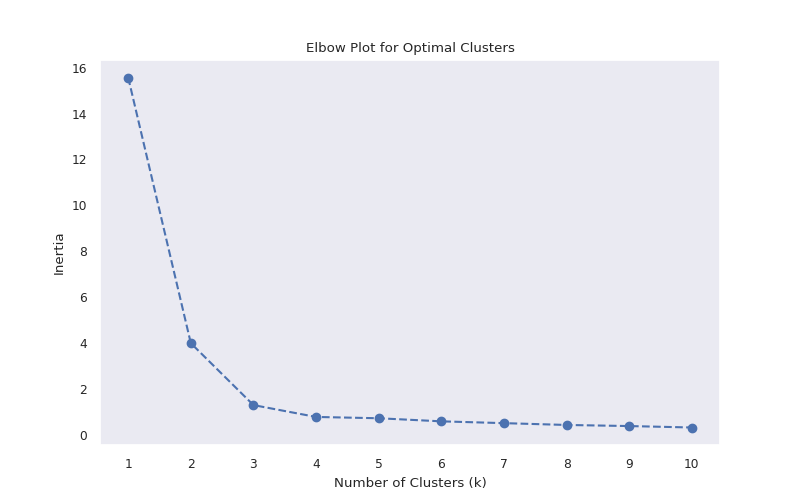

In [317]:
#from sklearn.datasets import make_blobs

## Generate synthetic data for demonstration
## Replace this with your actual dataset (X)
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Function to compute inertia for different numbers of clusters
def plot_elbow(X, max_clusters=10):
    inertia = []
    cluster_range = range(1, max_clusters + 1)

    # Compute K-Means for different cluster counts
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

# Call the function to plot the elbow
plot_elbow(X_dat, max_clusters=10)

In [318]:
kmeans = KMeans(
        n_clusters=4, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

df_tsne_res['kmeans'] = kmeans.labels_

In [319]:
df_tsne_res.to_csv("tsne_params.csv",index=False)

## Plot results

In [320]:
lab1 = 'efficiency'
lab2 = 'cond_entropy'
lab3 = 'inequality'
lab4 = 'kmeans'

In [321]:
#idx = 449
#point = [df_tsne_res['tsne_1'][idx], df_tsne_res['tsne_2'][idx]]
#point

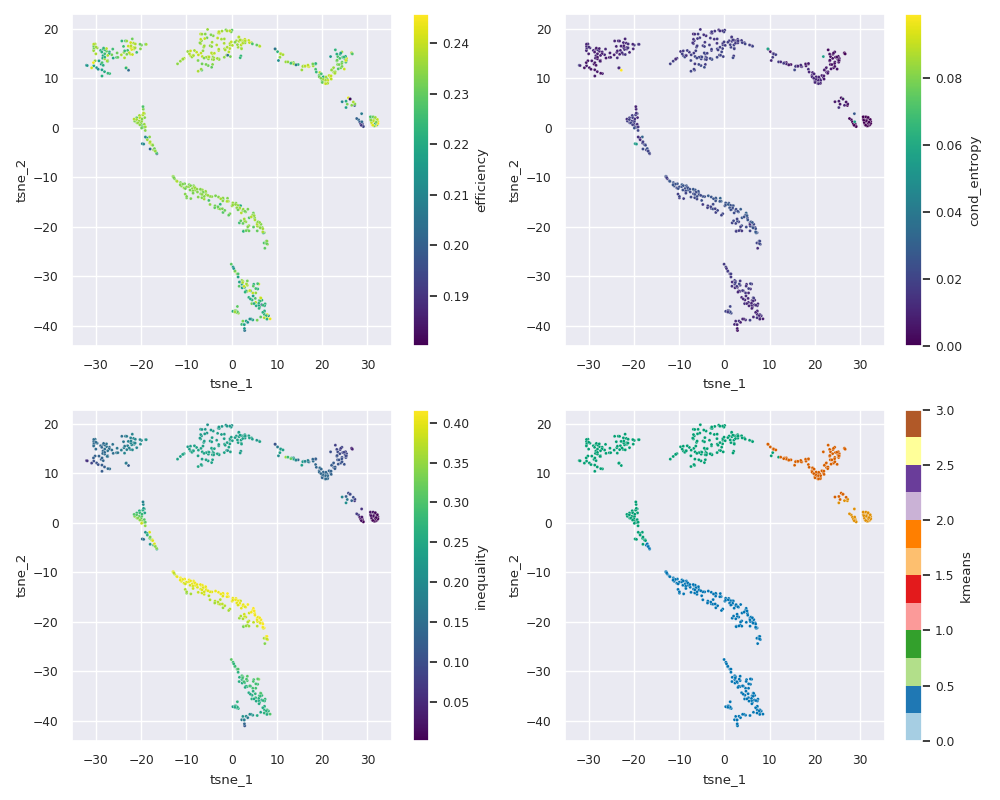

In [322]:
#2D plots
fig1, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

ax1 = sns.scatterplot(data=df_tsne_res, ax=axis[0][0], x='tsne_1', y='tsne_2', hue=lab1, palette='viridis',s=5)
norm1 = plt.Normalize(df_tsne_res[lab1].min(), df_tsne_res[lab1].max())
sm1 = plt.cm.ScalarMappable(cmap="viridis", norm=norm1)
sm1.set_array([])
ax1.get_legend().remove()
cb1 = plt.colorbar(mappable=sm1, ax=ax1)
cb1.set_label(lab1)

ax2 = sns.scatterplot(data=df_tsne_res, ax=axis[0][1], x='tsne_1', y='tsne_2', hue=lab2, palette='viridis',s=5)
norm2 = plt.Normalize(df_tsne_res[lab2].min(), df_tsne_res[lab2].max())
sm2 = plt.cm.ScalarMappable(cmap="viridis", norm=norm2)
sm2.set_array([])
ax2.get_legend().remove()
cb2 = plt.colorbar(mappable=sm2, ax=ax2)
cb2.set_label(lab2)

ax3 = sns.scatterplot(data=df_tsne_res, ax=axis[1][0], x='tsne_1', y='tsne_2', hue=lab3, palette='viridis',s=5)
norm3 = plt.Normalize(df_tsne_res[lab3].min(), df_tsne_res[lab3].max())
sm3 = plt.cm.ScalarMappable(cmap="viridis", norm=norm3)
sm3.set_array([])
ax3.get_legend().remove()
cb3 = plt.colorbar(mappable=sm3, ax=ax3)
cb3.set_label(lab3)

ax4 = sns.scatterplot(data=df_tsne_res, ax=axis[1][1], x='tsne_1', y='tsne_2', hue=lab4, palette='colorblind',s=5)
#sns.scatterplot(ax=axis[1][1], x=np.array([point[0]]), y=np.array([point[1]]), marker='x',color='b',s=100)
norm4 = plt.Normalize(df_tsne_res[lab4].min(), df_tsne_res[lab4].max())
sm4 = plt.cm.ScalarMappable(cmap="Paired", norm=norm4)
sm4.set_array([])
ax4.get_legend().remove()
cb4 = plt.colorbar(mappable=sm4, ax=ax4)
cb4.set_label(lab4)

plt.tight_layout()

In [323]:
#df_tsne_res[df_tsne_res['kmeans']==0]

# 3D

## t-sne

In [324]:
# # Get t-sne embeding with 3 dimensions
# tsne3 = TSNE(3,perplexity=30,random_state=123)
# tsne_result3 = tsne3.fit_transform(X_dat)
# tsne_result3.shape

In [325]:
# df_tsne_res3 = pd.DataFrame({'tsne_1': tsne_result3[:,0], 'tsne_2': tsne_result3[:,1], 'tsne_3': tsne_result3[:,2]})
# df_tsne_res3 = df_tsne_res3.join(df)
# df_tsne_res3.head()

## Plot results

In [326]:
# #3D plots

# fig = plt.figure(figsize=(14,14))
# ax1 = fig.add_subplot(2,2,1,projection='3d')
# fig.add_axes(ax1)
# sc1 = ax1.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab1], cmap='viridis')#, vmin=-200, vmax=200)
# ax1.set_xlabel('tsne_1')
# ax1.set_ylabel('tsne_2')
# ax1.set_zlabel('tsne_3')
# cbar1 = plt.colorbar(sc1)
# cbar1.set_label(lab1)

# ax2 = fig.add_subplot(2,2,2,projection='3d')
# fig.add_axes(ax2)
# sc2 = ax2.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab2], cmap='viridis')
# ax2.set_xlabel('tsne_1')
# ax2.set_ylabel('tsne_2')
# ax2.set_zlabel('tsne_3')
# cbar2 = plt.colorbar(sc2)
# cbar2.set_label(lab2)

# ax3 = fig.add_subplot(2,2,3,projection='3d')
# fig.add_axes(ax3)
# sc3 = ax3.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab3], cmap='viridis')
# ax3.set_xlabel('tsne_1')
# ax3.set_ylabel('tsne_2')
# ax3.set_zlabel('tsne_3')
# cbar3 = plt.colorbar(sc3)
# cbar3.set_label(lab3)

# ax4 = fig.add_subplot(2,2,4,projection='3d')
# fig.add_axes(ax4)
# sc4 = ax4.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab4], cmap='viridis')
# ax4.set_xlabel('tsne_1')
# ax4.set_ylabel('tsne_2')
# ax4.set_zlabel('tsne_3')
# cbar4 = plt.colorbar(sc4)
# cbar4.set_label(lab4)



# #plt.show()

In [327]:
#af = AffinityPropagation(damping=0.8,max_iter=3000,preference=-3, random_state=0).fit(X_dat)
#cluster_centers_indices = af.cluster_centers_indices_
#labels = af.labels_
#n_clusters = len(cluster_centers_indices)
#n_clusters, len(np.unique(labels))

In [328]:
##3D plot clustering
#lab = 'labels'

#fig0 = plt.figure(figsize=(8,8))
#ax = Axes3D(fig0)
#fig0.add_axes(ax)

#sc = ax.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=labels, cmap='Paired')#cmap='tab20')
#ax.set_xlabel('tsne_1')
#ax.set_ylabel('tsne_2')
#ax.set_zlabel('tsne_3')
#cbar = plt.colorbar(sc)
#cbar.set_label(lab)

##plt.show()

In [329]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.datasets import make_classification

# # Generate synthetic data for demonstration
# # Replace this with your actual dataset
# X, y = make_classification(
#    n_samples=1000,
#    n_features=5,
#    n_informative=3,
#    n_classes=3,
#    n_clusters_per_class=1,
#    random_state=42
# )

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dat, kmeans.labels_, test_size=0.3, random_state=42)

# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       0.00      0.00      0.00        11
           2       0.63      0.96      0.76        74
           3       0.00      0.00      0.00        34

    accuracy                           0.73       181
   macro avg       0.40      0.49      0.43       181
weighted avg       0.58      0.73      0.64       181


Confusion Matrix:
[[62  0  0  0]
 [ 0  0  8  3]
 [ 3  0 71  0]
 [ 0  0 34  0]]


/home/carlos/python/environments/vfarol/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/carlos/python/environments/vfarol/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/carlos/python/environments/vfarol/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

In [330]:
model.coef_

array([[-2.23181822, -0.10945001, -9.10348794],
       [ 1.95464745, -1.73881693,  4.36991495],
       [-0.52122886,  1.59568828,  0.63099517],
       [ 0.79839964,  0.25257866,  4.10257782]])